In [38]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

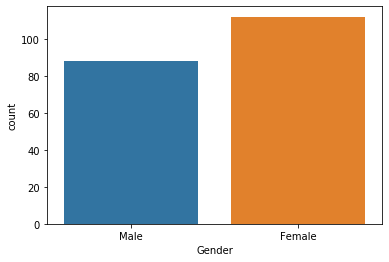

In [6]:
sns.countplot(df['Gender'])

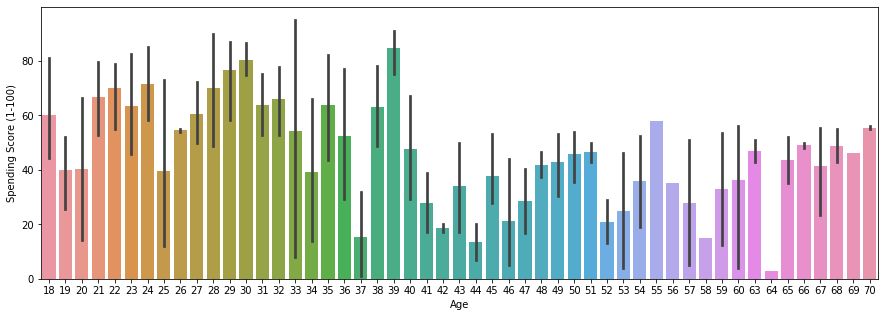

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='Spending Score (1-100)',data=df)

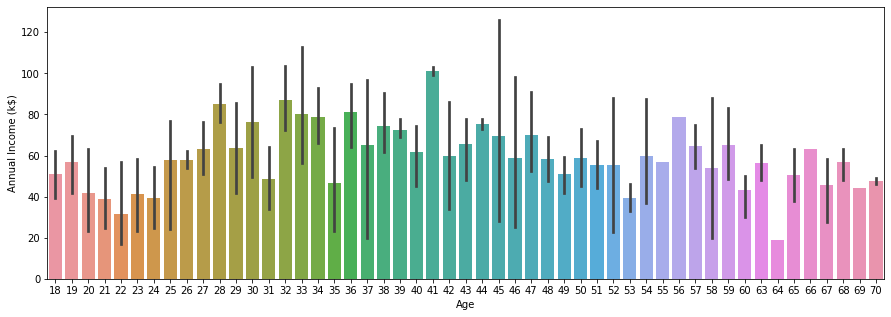

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='Annual Income (k$)',data=df)

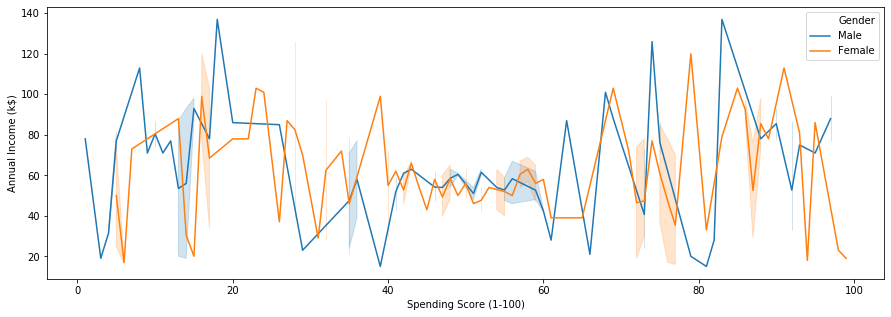

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender',data=df)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
print(np.median(df['Spending Score (1-100)']))
print(np.median(df['Annual Income (k$)']))

50.0
61.5


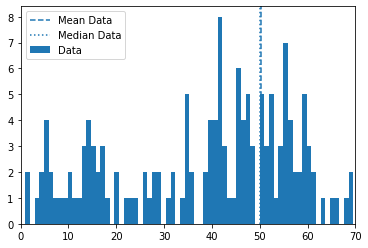

In [12]:
data=df['Spending Score (1-100)']
#outlier = np.insert(data, 0, 200)
plt.hist(data, label="Data", bins=100);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
#plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
#plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,70);

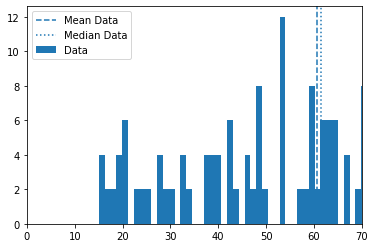

In [13]:
data=df['Annual Income (k$)']
#outlier = np.insert(data, 0, 200)
plt.hist(data, label="Data", bins=100);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
#plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
#plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,70);

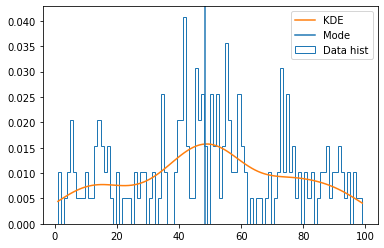

In [14]:
data=df['Spending Score (1-100)']
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 100)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=100, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

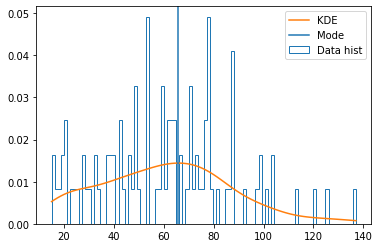

In [15]:
data=df['Annual Income (k$)']
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 100)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=100, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

In [16]:
print(np.var(df['Annual Income (k$)'],ddof=1))
print(np.std(df['Annual Income (k$)'],ddof=1))

689.8355778894478
26.264721165271254


In [17]:
print(np.var(df['Spending Score (1-100)'],ddof=1))
print(np.std(df['Spending Score (1-100)'],ddof=1))

666.8542713567833
25.823521668370162


In [18]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var ** 1.5)
skewness = st.skew(data)
print(skewness, get_skewness(df['Spending Score (1-100)']))

0.319423684276314 -0.04686530945553505


In [20]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var ** 1.5)
skewness = st.skew(data)
print(skewness, get_skewness(df['Annual Income (k$)']))

0.319423684276314 0.3194236842763132


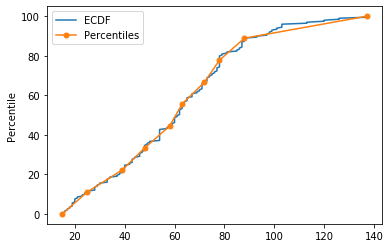

In [29]:
data=df['Annual Income (k$)']
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

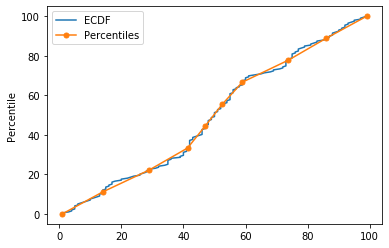

In [30]:
data=df['Spending Score (1-100)']
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

In [31]:
covariance = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].cov()
print(covariance)

                        Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)              689.835578                6.716583
Spending Score (1-100)            6.716583              666.854271


In [32]:
correlation = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].corr()
print(correlation)

                        Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)                1.000000                0.009903
Spending Score (1-100)            0.009903                1.000000


(4.0, 0.0)

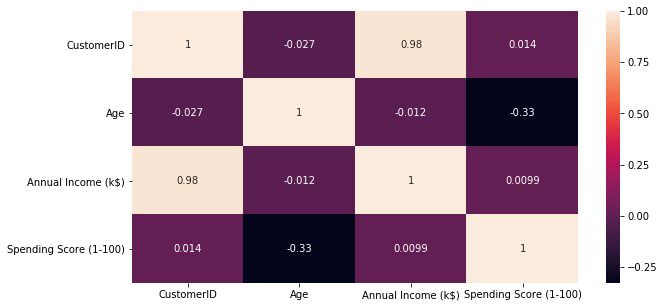

In [41]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Rejection: 0 points
z_score of 3 corresponds to prob of 0.00%


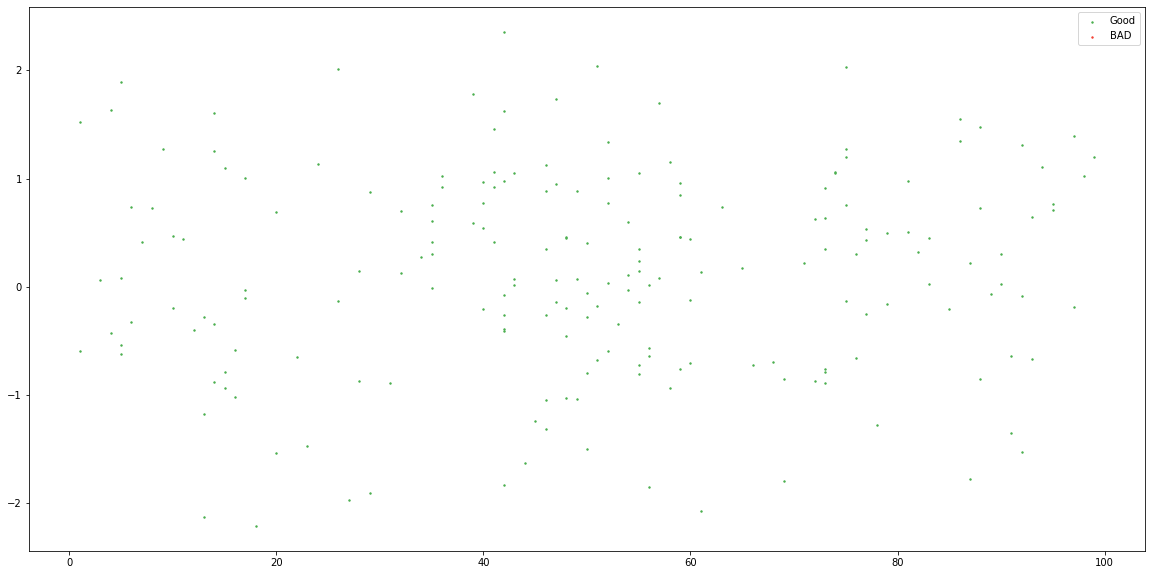

In [44]:
#Outliers Detection
mean,std=np.mean(df['Spending Score (1-100)']),np.std(df['Spending Score (1-100)'])
z_score=np.abs((df['Spending Score (1-100)']-mean)/std)
threshold=6
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['Spending Score (1-100)'].size)

plt.figure(figsize=(20,10))
plt.scatter(df['Spending Score (1-100)'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['Spending Score (1-100)'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

Rejection: 0 points
z_score of 3 corresponds to prob of 0.27%


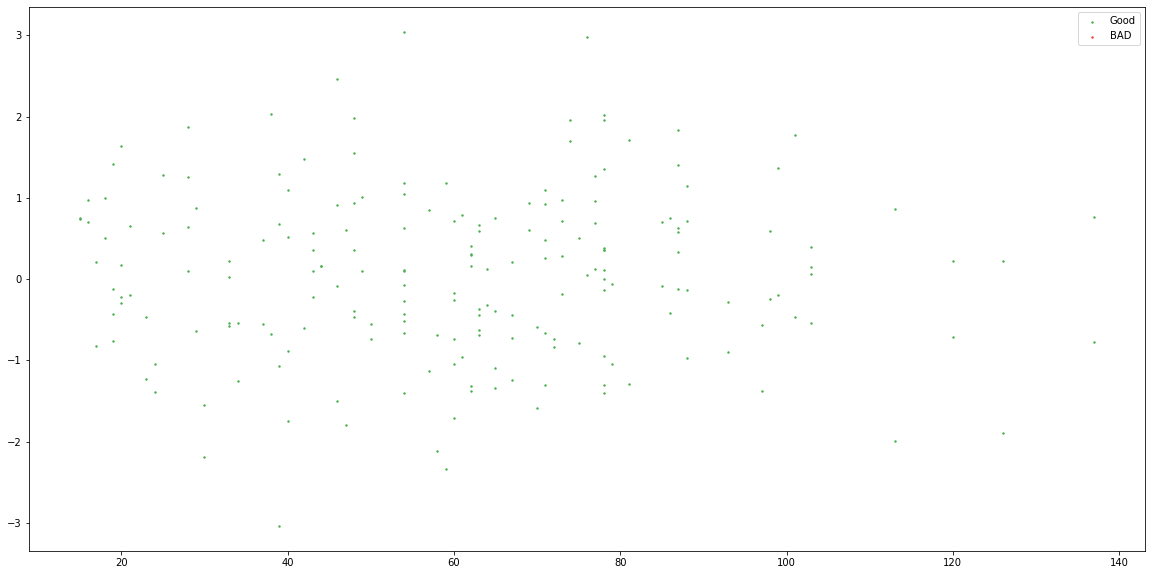

In [46]:
#Outliers Detection
mean,std=np.mean(df['Annual Income (k$)']),np.std(df['Annual Income (k$)'])
z_score=np.abs((df['Annual Income (k$)']-mean)/std)
threshold=3
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['Annual Income (k$)'].size)

plt.figure(figsize=(20,10))
plt.scatter(df['Annual Income (k$)'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['Annual Income (k$)'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

In [47]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
df.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [54]:
df[df['Age']==70]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
70,71,Male,70,49,55


In [55]:
df[df['Spending Score (1-100)']==99]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


In [56]:
df[df['Annual Income (k$)']==137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [61]:
df.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [62]:
df.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [65]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['Gender']=en.fit_transform(df['Gender'])

In [67]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

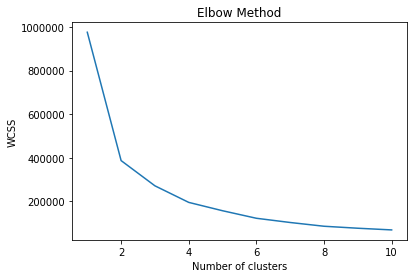

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
labels = kmeans.labels_

In [75]:
df['clusters'] = labels

In [77]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


Text(27.468689236111118, 0.5, 'Duration')

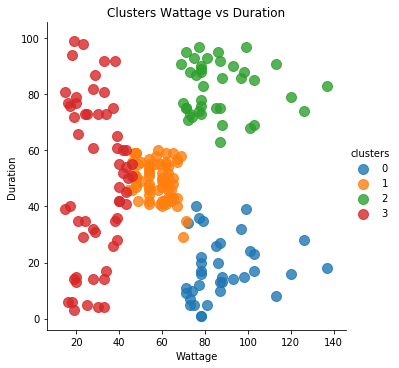

In [81]:
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', 
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Wattage vs Duration')
plt.xlabel('Wattage')
plt.ylabel('Duration')

In [ ]:
df['Gender']=df['Gender'].apply(lambda x: 'Male' if x==1 else 'Female')

In [99]:
df_1=df[df['clusters']==1]
df_2=df[df['clusters']==2]
df_3=df[df['clusters']==3]
df_0=df[df['clusters']==0]

In [100]:
df_1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
count,66.000000,66.000000,66.000000,66.000000,66.0
mean,92.484848,43.878788,57.727273,49.257576,1.0
std,19.379007,17.170202,6.929414,6.615391,0.0
min,58.000000,18.000000,44.000000,29.000000,1.0
25%,76.250000,26.250000,54.000000,44.500000,1.0
50%,92.500000,47.000000,59.500000,49.000000,1.0
75%,108.750000,58.500000,63.000000,55.000000,1.0
max,127.000000,70.000000,71.000000,60.000000,1.0


In [101]:
df_1['Gender'].value_counts()

Female    37
Male      29
Name: Gender, dtype: int64

In [102]:
df_2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,2.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,2.0
25%,143.000000,30.000000,75.500000,74.500000,2.0
50%,162.000000,32.000000,79.000000,83.000000,2.0
75%,181.000000,35.500000,95.000000,90.000000,2.0
max,200.000000,40.000000,137.000000,97.000000,2.0


In [103]:
df_2['Gender'].value_counts()

Female    21
Male      18
Name: Gender, dtype: int64

In [104]:
df_3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
count,59.000000,59.000000,59.000000,59.000000,59.0
mean,30.067797,36.101695,29.864407,49.864407,3.0
std,17.295469,13.731031,9.685499,27.887371,0.0
min,1.000000,18.000000,15.000000,3.000000,3.0
25%,15.500000,24.000000,20.000000,30.000000,3.0
50%,30.000000,33.000000,29.000000,51.000000,3.0
75%,44.500000,48.500000,39.000000,73.000000,3.0
max,62.000000,67.000000,46.000000,99.000000,3.0


In [105]:
df_3['Gender'].value_counts()

Female    37
Male      22
Name: Gender, dtype: int64

In [106]:
df_0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,164.000000,40.805556,87.916667,17.888889,0.0
std,21.071308,11.305674,16.231143,10.708549,0.0
min,129.000000,19.000000,71.000000,1.000000,0.0
25%,146.500000,34.000000,77.000000,10.000000,0.0
50%,164.000000,41.500000,83.000000,16.000000,0.0
75%,181.500000,47.250000,97.250000,24.500000,0.0
max,199.000000,59.000000,137.000000,40.000000,0.0


In [107]:
df_0['Gender'].value_counts()

Male      19
Female    17
Name: Gender, dtype: int64